<a href="https://www.kaggle.com/code/wildorange/spotify-kulikov-ivan-at-06-notebook?scriptVersionId=213076866" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify/dataset.csv


# EDA

* track_id - ID трека
* artists - имена исполнителей
* album_name - название альбома
* track_name - название трека
* popularity популярность трека
* duration_ms - длина трека в миллисекундах
* explicit - откровенный контент
* danceability - “танцевальность” трека
* energy - энергичность трека
* key - тональность трека
* loudness - громкость трека в децибелах -
* mode - модальность трека 
* speechiness - наличие слов в треке
* acousticness - акустичность
* instrumentalness - инструментальность
* liveness - тип исполнения (живое/студийное)
* valence - позитивность трека
* tempo - темп трека в ударах в минуту
* time_signature - временой интервал трека


In [2]:
df = pd.read_csv('/kaggle/input/spotify/dataset.csv')
df.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [3]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Дропнем строки с нулевыми пустыми значениями

In [4]:
df = df.dropna()

Нормализуем данные в колонке tempo

In [5]:
sum = df['tempo'].sum()
def normalize(value):
    global sum
    return value/sum
df['tempo'] = df['tempo'].apply(normalize)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,0.000006,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,0.000006,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,0.000005,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,0.000013,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,0.000009,4,acoustic


Переведем ms в длительности трека в min, чтобы уменьшить значения

In [6]:
def ms_conventer(ms):
    return round(ms/(1000*60), 1)
df['duration_ms'] = df['duration_ms'].apply(ms_conventer)
df = df.rename(columns={'duration_ms': 'duration_min'})
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_min,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,3.8,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,0.000006,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,2.5,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,0.000006,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,3.5,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,0.000005,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,3.4,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,0.000013,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,3.3,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,0.000009,4,acoustic


Переведем данные в числовые для матрицы корелляции, а также избавимся от колонки unnamed и track_id, т.к. это просто порядковый номер и id трека соот-но.

In [7]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit(df['artists'].unique())
df['artists'] = LE.transform(df['artists'])
LE.fit(df['album_name'].unique())
df['album_name'] = LE.transform(df['album_name'])
LE.fit(df['track_name'].unique())
df['track_name'] = LE.transform(df['track_name'])
LE.fit(df['explicit'].unique())
df[ 'explicit'] = LE.transform(df['explicit'])
LE.fit(df['track_genre'].unique())
df['track_genre'] = LE.transform(df['track_genre'])
df = df.drop(['Unnamed: 0', 'track_id'], axis=1)
df

,artists,album_name,track_name,popularity,duration_min,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,10357,8100,11741,73,3.8,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,0.000006,4,0
1,3287,14796,22528,55,2.5,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,0.000006,4,0
2,12397,39162,60774,57,3.5,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,0.000005,4,0
3,14839,8580,9580,71,3.4,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,0.000013,3,0
4,5255,16899,25689,82,3.3,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,0.000009,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,22486,66,53329,21,6.4,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,0.000009,5,113
113996,22486,66,65090,22,6.4,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,0.000006,4,113
113997,4952,5028,38207,22,4.5,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,0.000010,4,113
113998,18534,7238,21507,41,4.7,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,0.000010,4,113


Поищем закономерности в таблице корелляции

In [8]:
correlation_table = df.corr()
for column in correlation_table.columns:
    if correlation_table[column].nlargest(2).iloc[1] > 0.75:
        print(column)

energy
loudness


Т.к. колонки energy и loudness почти одинаковы (зависят друг от друга больше чем на 75%), то не будет лишним объеидинить их в одну

In [9]:
df['energy'] = df['energy'] * df['loudness']
df = df.drop(['loudness'], axis=1)
df

,artists,album_name,track_name,popularity,duration_min,explicit,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,10357,8100,11741,73,3.8,0,0.676,-3.109906,1,0,0.1430,0.0322,0.000001,0.3580,0.7150,0.000006,4,0
1,3287,14796,22528,55,2.5,0,0.420,-2.861010,1,1,0.0763,0.9240,0.000006,0.1010,0.2670,0.000006,4,0
2,12397,39162,60774,57,3.5,0,0.438,-3.494506,0,1,0.0557,0.2100,0.000000,0.1170,0.1200,0.000005,4,0
3,14839,8580,9580,71,3.4,0,0.266,-1.103494,0,1,0.0363,0.9050,0.000071,0.1320,0.1430,0.000013,3,0
4,5255,16899,25689,82,3.3,0,0.618,-4.288683,2,1,0.0526,0.4690,0.000000,0.0829,0.1670,0.000009,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,22486,66,53329,21,6.4,0,0.172,-3.852355,5,1,0.0422,0.6400,0.928000,0.0863,0.0339,0.000009,5,113
113996,22486,66,65090,22,6.4,0,0.174,-2.143206,0,0,0.0401,0.9940,0.976000,0.1050,0.0350,0.000006,4,113
113997,4952,5028,38207,22,4.5,0,0.629,-3.584455,0,0,0.0420,0.8670,0.000000,0.0839,0.7430,0.000010,4,113
113998,18534,7238,21507,41,4.7,0,0.587,-5.509834,7,1,0.0297,0.3810,0.000000,0.2700,0.4130,0.000010,4,113


C помощью графика проанализируем зависимость популярности треков от их продолжительности

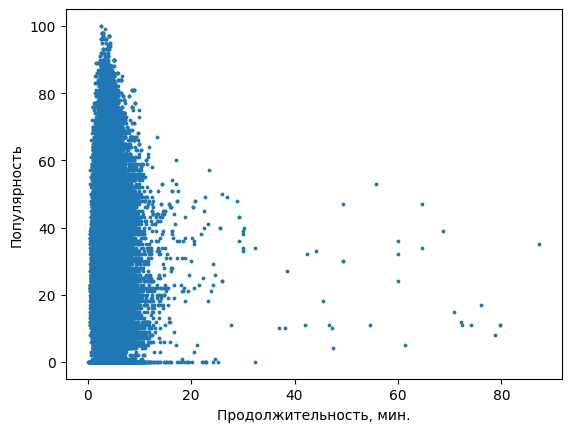

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df['duration_min'], df['popularity'], s=3)
plt.xlabel('Продолжительность, мин.')
plt.ylabel('Популярность')
plt.show()

Таким образом, большинство популярных песен длятся меньше 15/10 минут.

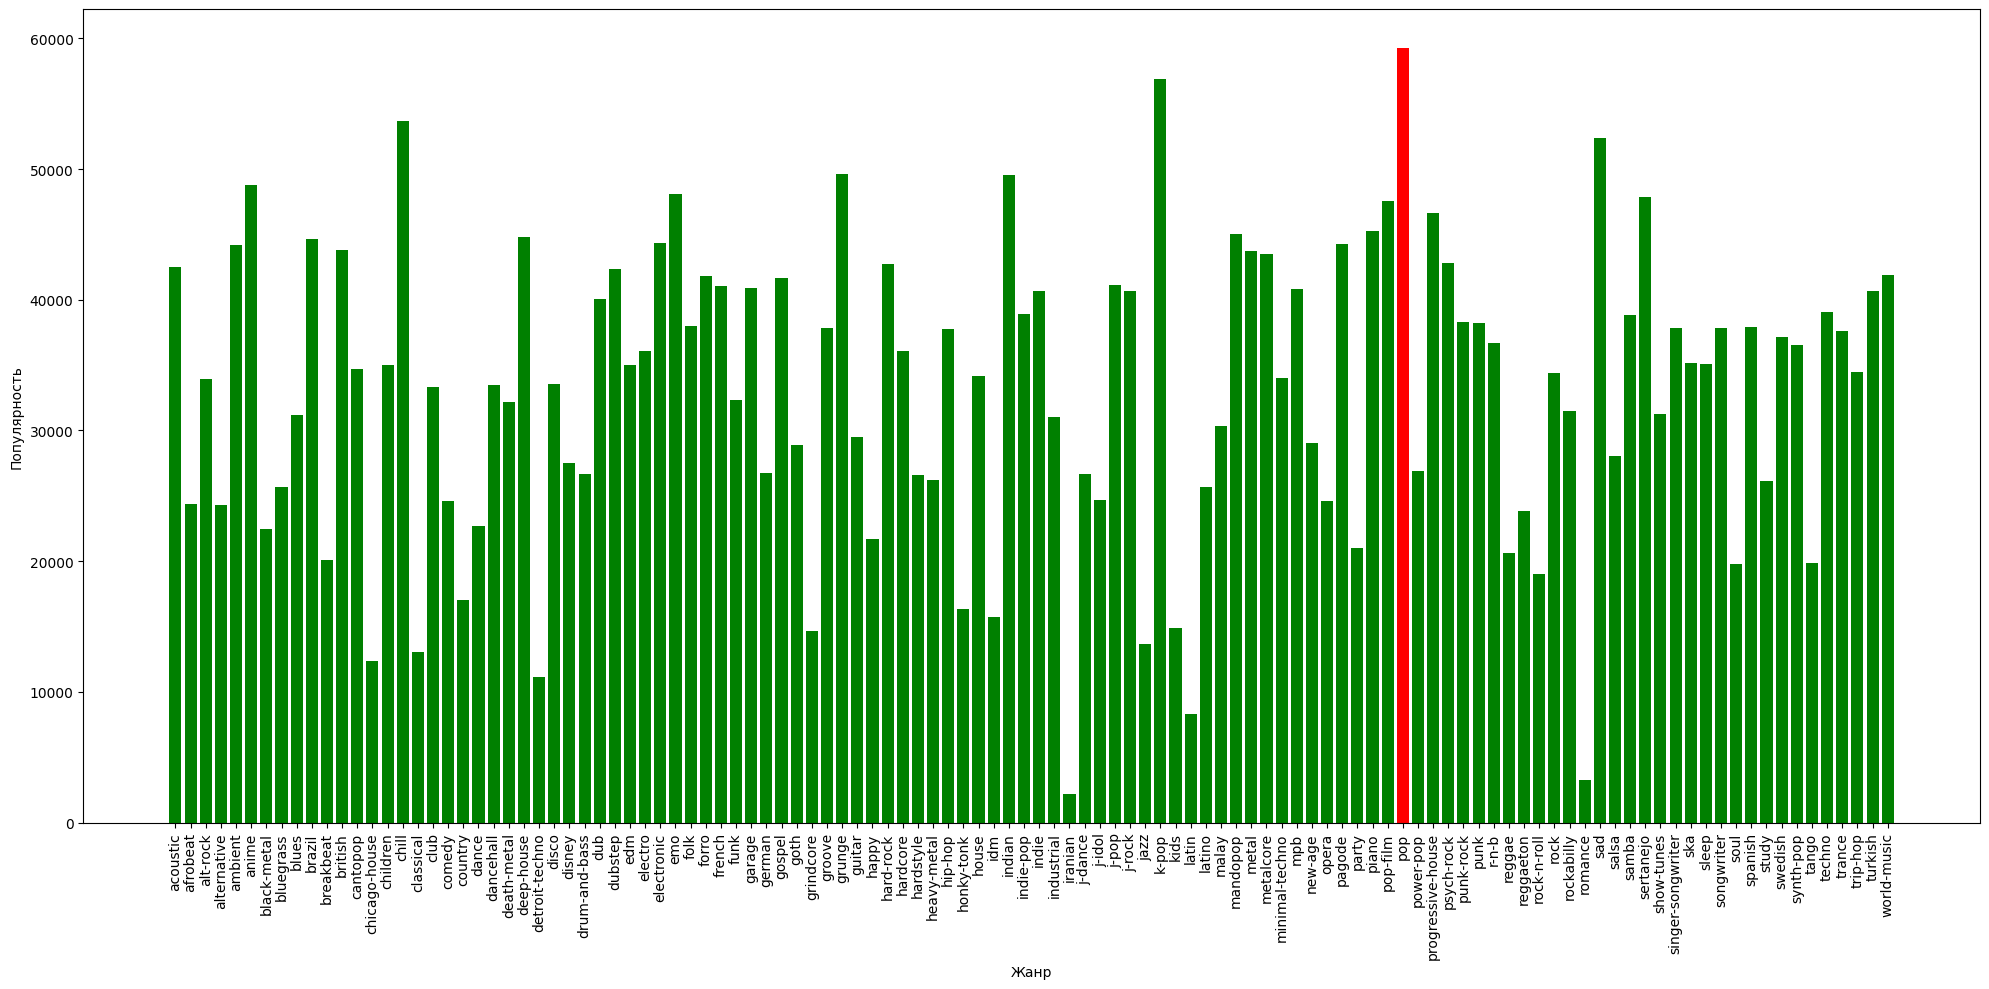

In [11]:
temporary_df = pd.read_csv('/kaggle/input/spotify/dataset.csv')
popularity_per_genre = list(temporary_df.groupby('track_genre')['popularity'].sum())
genres = list(temporary_df['track_genre'].unique())
top_indices = popularity_per_genre.index(max(popularity_per_genre))
colors = ['green'] * len(popularity_per_genre)
colors[top_indices] = 'red'
plt.figure(figsize=(20,10))
plt.bar(genres, popularity_per_genre, color=colors)
plt.xlabel('Жанр')
plt.ylabel('Популярность')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()

Как мы видим, самый популярный жанр - поп-музыка

Для наглядности выведем топ 3 наиболее популярных и непопулярных трека 

In [12]:
popularity_dict = dict(zip(genres, popularity_per_genre))
popularity_dict = dict(sorted(popularity_dict.items(), key=lambda item: item[1], reverse=True))

import itertools

print('Популярные: ')
for key, value in itertools.islice(popularity_dict.items(), 3):
    print(f'Жанр: {key}, популярность: {value}')

popularity_dict = dict(sorted(popularity_dict.items(), key=lambda item: item[1], reverse=False))
print()
print('Непопулярные: ')
for key, value in itertools.islice(popularity_dict.items(), 3):
    print(f'Жанр: {key}, популярность: {value}')

Популярные: 
Жанр: pop, популярность: 59283
Жанр: k-pop, популярность: 56896
Жанр: chill, популярность: 53651

Непопулярные: 
Жанр: iranian, популярность: 2210
Жанр: romance, популярность: 3245
Жанр: latin, популярность: 8297


Проверим какие треки нравятся публике больше: с положительными эмоциями или негативными:

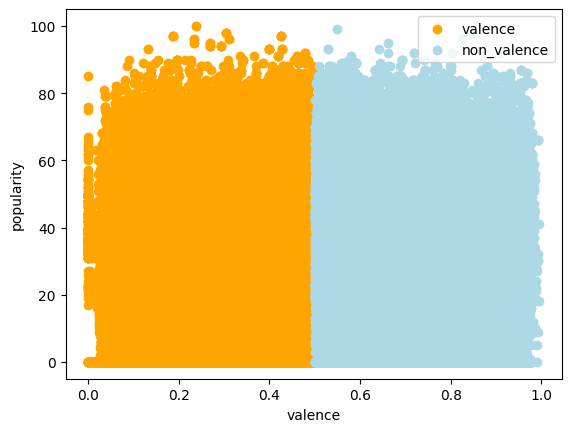

In [13]:
import matplotlib.pyplot as plt

non_valence = df[df['valence'] > 0.5]
valence = df[df['valence'] <= 0.5]

plt.scatter(valence['valence'], valence['popularity'], c='orange', label='valence')
plt.scatter(non_valence['valence'], non_valence['popularity'], c='lightblue', label='non_valence')

plt.legend()
plt.xlabel('valence')
plt.ylabel('popularity')
plt.show()


Выходит, что популярны как и негативные треки, так и положительные

Также можно проанализировать популярность треков с откровенным контентом и без него

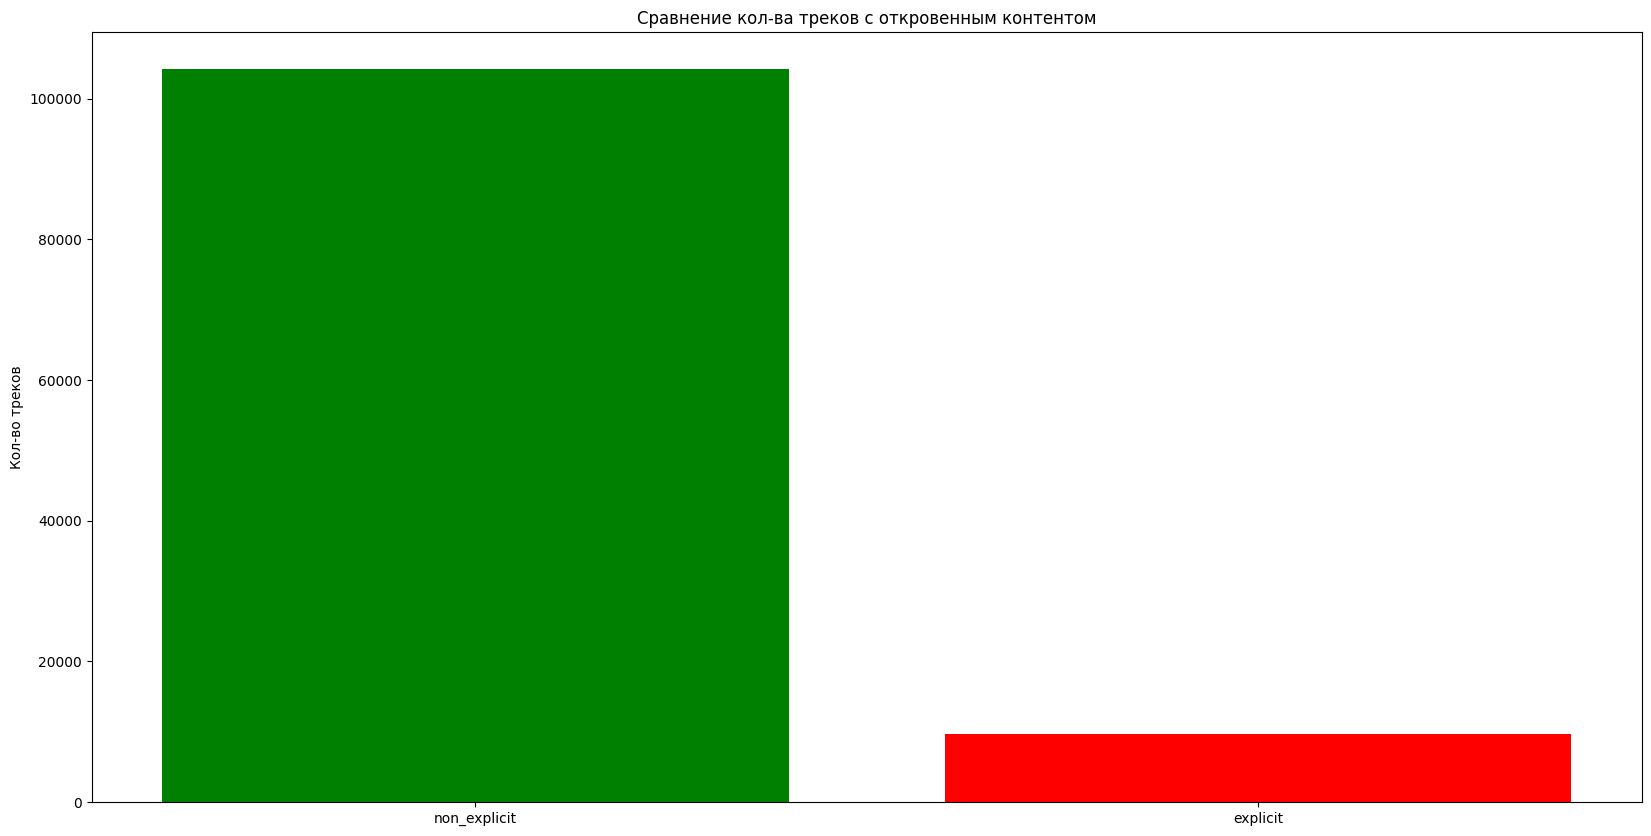

In [14]:
explicit = df['explicit'].sum()
non_explicit = df.shape[0] - explicit
colors = ['green', 'green']
if explicit > non_explicit:
    colors[0] = 'red'
else:
    colors[1] = 'red'
plt.figure(figsize=(20, 10))
plt.bar(['non_explicit', 'explicit'], [non_explicit, explicit], color=colors)
plt.ylabel("Кол-во треков")
plt.title("Сравнение кол-ва треков с откровенным контентом")
plt.show()

Проверка